In [ ]:
import numpy as np
from scipy import signal
from scipy.integrate import odeint
import matplotlib.pyplot as plt


tau_i = 2.0  # Internal delay time constant
tau_d = 1.0  # Dead time
v_new = 1.0  # Target running speed

T_final = 10.0  # Total simulation time (s)
dt = 0.01  # Time step (s)
t = np.arange(0, T_final, dt)


def command_signal(t):
    """Step function as an input signal for the system."""
    return 1.0 if t >= 0 else 0.0


u_values = np.array([command_signal(ti) for ti in t])


def perceived_signal(t):
    """perceived signal p(t) with dead time tau_d"""
    return command_signal(t - tau_d) if t >= tau_d else 0.0


p_values = np.array([perceived_signal(ti) for ti in t])


def system_dynamics(x, t, p):
    """First-order system dynamics with internal delay."""
    return -(1 / tau_i) * (x - v_new * p)


In [ ]:
# Simulation with SciPy's odeint
x = np.zeros_like(t)
for i in range(1, len(t)):
    x[i] = odeint(system_dynamics, x[i - 1], [t[i - 1], t[i]], args=(p_values[i - 1],))[
        1
    ]


# Calculate key response metrics
rise_time_idx = np.where(x > 0.9)[0][0] if np.any(x > 0.9) else -1
settling_time_idx = (
    np.where(np.abs(x - 1.0) < 0.02)[0][0] if np.any(np.abs(x - 1.0) < 0.02) else -1
)

rise_time = t[rise_time_idx] if rise_time_idx != -1 else "N/A"
settling_time = t[settling_time_idx] if settling_time_idx != -1 else "N/A"

print(f"Rise time: {rise_time}")
print(f"Settling time: {settling_time}")

Rise time: 5.61
Settling time: 8.83


/tmp/ipykernel_3346/2882028550.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[i] = odeint(


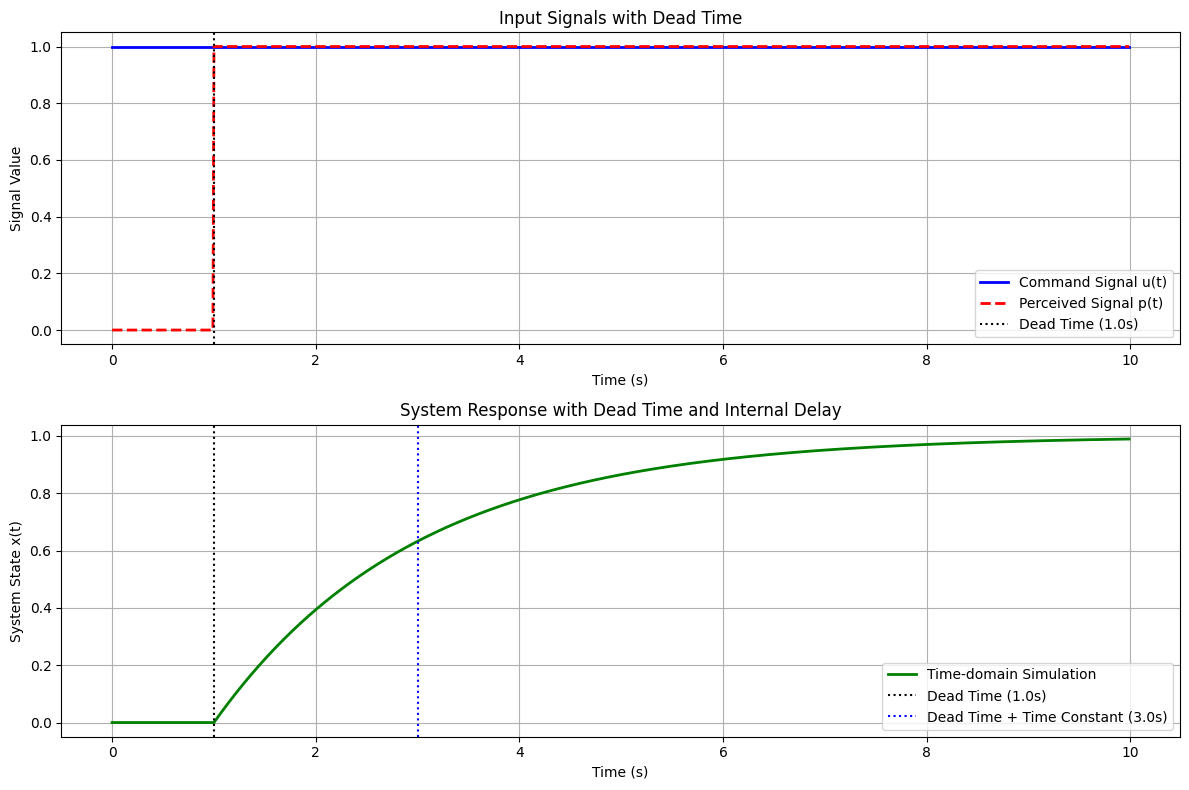

In [6]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t, u_values, 'b-', linewidth=2, label='Command Signal u(t)')
plt.plot(t, p_values, 'r--', linewidth=2, label='Perceived Signal p(t)')
plt.axvline(x=tau_d, color='k', linestyle=':', label=f'Dead Time ({tau_d}s)')
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('Input Signals with Dead Time')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, x, 'g-', linewidth=2, label='Time-domain Simulation')
plt.axvline(x=tau_d, color='k', linestyle=':', label=f'Dead Time ({tau_d}s)')
plt.axvline(x=tau_d+tau_i, color='b', linestyle=':', 
           label=f'Dead Time + Time Constant ({tau_d+tau_i}s)')
plt.xlabel('Time (s)')
plt.ylabel('System State x(t)')
plt.title('System Response with Dead Time and Internal Delay')
plt.grid(True)
plt.legend()

plt.tight_layout()

/tmp/ipykernel_3346/1682372647.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_temp[i] = odeint(
/tmp/ipykernel_3346/1682372647.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_temp[i] = odeint(


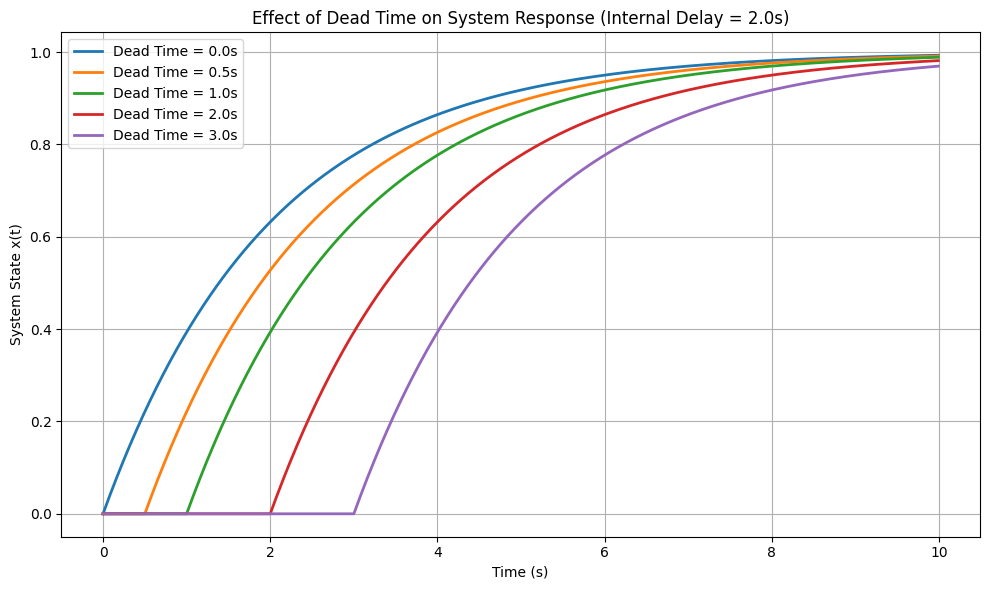

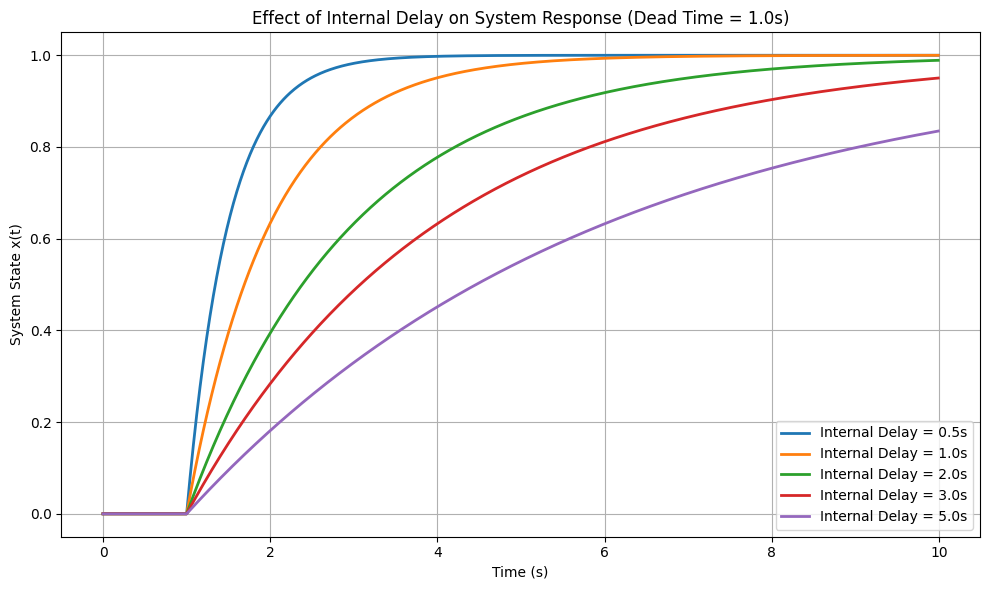

In [9]:
# Simulation with different dead-time parameters
plt.figure(figsize=(10, 6))
dead_time_values = [0.0, 0.5, 1.0, 2.0, 3.0]

for dead_time in dead_time_values:
    p_temp = np.array(
        [command_signal(ti - dead_time) if ti >= dead_time else 0.0 for ti in t]
    )

    x_temp = np.zeros_like(t)
    for i in range(1, len(t)):
        x_temp[i] = odeint(
            system_dynamics, x_temp[i - 1], [t[i - 1], t[i]], args=(p_temp[i - 1],)
        )[1]

    plt.plot(t, x_temp, linewidth=2, label=f"Dead Time = {dead_time}s")

plt.xlabel("Time (s)")
plt.ylabel("System State x(t)")
plt.title(f"Effect of Dead Time on System Response (Internal Delay = {tau_i}s)")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Simulation with varying internal delay parameters
plt.figure(figsize=(10, 6))
internal_delay_values = [0.5, 1.0, 2.0, 3.0, 5.0]

for internal_delay in internal_delay_values:
    x_temp = np.zeros_like(t)
    for i in range(1, len(t)):
        x_temp[i] = odeint(
            system_dynamics, x_temp[i - 1], [t[i - 1], t[i]], args=(p_values[i - 1],)
        )[-1]

        x_temp[i] = x_temp[i - 1] + dt * (
            -(1 / internal_delay) * (x_temp[i - 1] - v_new * p_values[i - 1])
        )

    plt.plot(t, x_temp, linewidth=2, label=f"Internal Delay = {internal_delay}s")

plt.xlabel("Time (s)")
plt.ylabel("System State x(t)")
plt.title(f"Effect of Internal Delay on System Response (Dead Time = {tau_d}s)")
plt.grid(True)
plt.legend()
plt.tight_layout()


plt.show()